<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    94.411221  53.013147  54.402532  108.343567  320.170467   
      1.0    28.938610  26.561925  28.491017   43.081542  137.073094   
      2.0    26.325957  96.620437  99.639481  -20.395259  212.190617   
      3.0    92.953662  47.589834  74.549904   54.516527  279.609927   
      4.0    78.364570  72.092164  28.380350  -13.971919  174.865166   
...                ...        ...        ...         ...         ...   
999.0 55.0   23.127925  38.093636  44.900109  -55.065695   61.055975   
      56.0   74.032957  56.119272  53.154222  130.349277  323.655729   
      57.0   21.297985  40.059531  92.196508   50.930832  214.484856   
      58.0   21.360695  55.599755  28.796491   27.317469  143.074409   
      59.0   86.052547  21.712453  96.595702   15.769683  230.130386   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    227.461676   92.708791  
      1.0     83.198248   53.874846  
      2.0    283.784625  -71.594009  
      3.0    224.620736   54.989191  
      4.0    240.648885  -65.783720  
...                 ...         ...  
999.0 55.0    90.433320  -29.377345  
      56.0   171.581872  152.073857  
      57.0   121.260065   93.224790  
      58.0    66.446031   76.628378  
      59.0   241.613214  -11.482828  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    94.411221  53.013147  54.402532  108.343567  320.170467   
      1.0    28.938610  26.561925  28.491017   43.081542  137.073094   
      2.0    26.325957  96.620437  99.639481  -20.395259  212.190617   
      3.0    92.953662  47.589834  74.549904   54.516527  279.609927   
      4.0    78.364570  72.092164  28.380350  -13.971919  174.865166   
...                ...        ...        ...         ...         ...   
999.0 55.0   23.127925  38.093636  44.900109  -55.065695   61.055975   
      56.0   74.032957  56.119272  53.154222  130.349277  323.655729   
      57.0   21.297985  40.059531  92.196508   50.930832  214.484856   
      58.0   21.360695  55.599755  28.796491   27.317469  143.074409   
      59.0   86.052547  21.712453  96.595702   15.769683  230.130386   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    227.461676   92.708791  
      1.0     83.198248   53.874846  
      2.0    283.784625  -71.594009  
      3.0    224.620736   54.989191  
      4.0    240.648885  -65.783720  
...                 ...         ...  
999.0 55.0    90.433320  -29.377345  
      56.0   171.581872  152.073857  
      57.0   121.260065   93.224790  
      58.0    66.446031   76.628378  
      59.0   241.613214  -11.482828  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    94.411221  53.013147  54.402532  108.343567  320.170467   
      1.0    28.938610  26.561925  28.491017   43.081542  137.073094   
      2.0    26.325957  96.620437  99.639481  -20.395259  212.190617   
      3.0    92.953662  47.589834  74.549904   54.516527  279.609927   
      4.0    78.364570  72.092164  28.380350  -13.971919  174.865166   
...                ...        ...        ...         ...         ...   
999.0 55.0   23.127925  38.093636  44.900109  -55.065695   61.055975   
      56.0   74.032957  56.119272  53.154222  130.349277  323.655729   
      57.0   21.297985  40.059531  92.196508   50.930832  214.484856   
      58.0   21.360695  55.599755  28.796491   27.317469  143.074409   
      59.0   86.052547  21.712453  96.595702   15.769683  230.130386   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    227.461676   92.708791  
      1.0     83.198248   53.874846  
      2.0    283.784625  -71.594009  
      3.0    224.620736   54.989191  
      4.0    240.648885  -65.783720  
...                 ...         ...  
999.0 55.0    90.433320  -29.377345  
      56.0   171.581872  152.073857  
      57.0   121.260065   93.224790  
      58.0    66.446031   76.628378  
      59.0   241.613214  -11.482828  

[60000 rows x 7 columns]

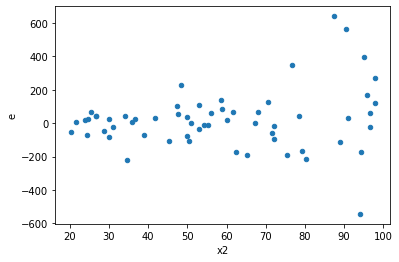

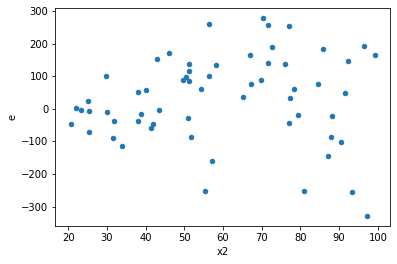

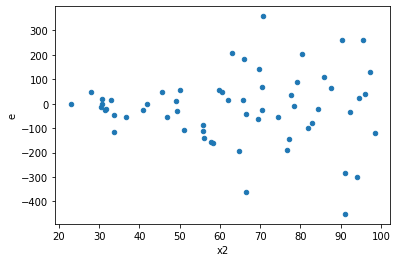

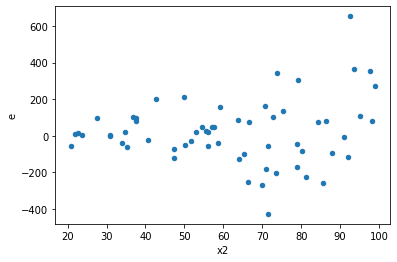

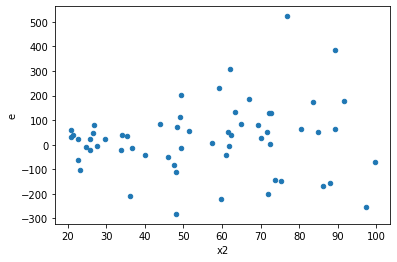

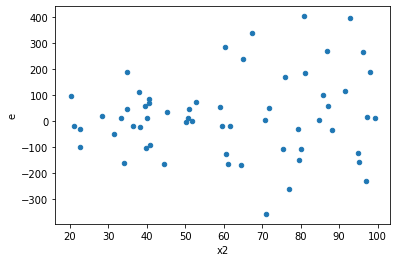

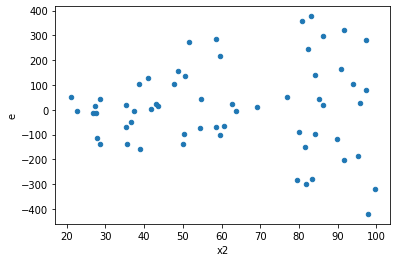

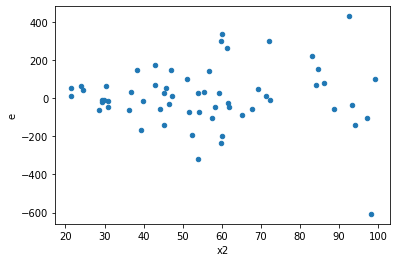

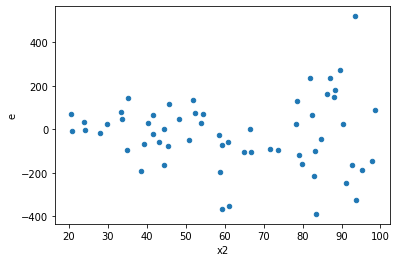

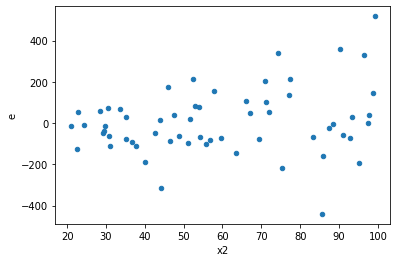

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,120198.07349765151,1333856.9184425592,5723.717785602453,63516.996116312344,11.097157214159683,7.349460393601959e-07,0.9999996325269803,3.6747301968009793e-07,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,80647.90925569694,413812.5874876422,3840.376631223664,19705.361308935342,5.131101243748741,0.0004238278160919595,0.999788086091954,0.00021191390804597976,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,258161.7829052828,687069.3968602497,12293.418233584895,32717.590326678557,2.661390811328295,0.029645294142053524,0.9851773529289732,0.014822647071026762,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,386644.39277181926,889426.9671513954,18411.637751039012,42353.6651024474,2.300374669279884,0.06284459895066896,0.9685777005246655,0.03142229947533448,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,288305.17302073014,602794.3780151979,13728.817762891911,28704.4941911999,2.0908205416482586,0.0985716801999823,0.9507141599000088,0.04928584009999115,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,223618.2802882374,959135.3721733268,10648.489537535115,45673.11296063461,4.289163528746529,0.001535065223921439,0.9992324673880393,0.0007675326119607195,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,447631.1071752195,706748.2061782771,21315.767008343788,33654.67648467986,1.578863029958348,0.3031621281335779,0.848418935933211,0.15158106406678895,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,368801.6876409457,773905.5092452778,17561.985125759318,36852.643297394185,2.098432667690852,0.09695831679204314,0.9515208416039784,0.04847915839602157,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,587003.8087396474,721830.7880424322,27952.56232093559,34372.894668687244,1.2296867197374255,0.6399775205186355,0.6800112397406822,0.3199887602593178,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,120198.07349765151,1333856.9184425592,5723.717785602453,63516.996116312344,11.097157214159683,7.349460393601959e-07,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,80647.90925569694,413812.5874876422,3840.376631223664,19705.361308935342,5.131101243748741,0.0004238278160919595,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,258161.7829052828,687069.3968602497,12293.418233584895,32717.590326678557,2.661390811328295,0.029645294142053524,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,386644.39277181926,889426.9671513954,18411.637751039012,42353.6651024474,2.300374669279884,0.06284459895066896,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,288305.17302073014,602794.3780151979,13728.817762891911,28704.4941911999,2.0908205416482586,0.0985716801999823,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,223618.2802882374,959135.3721733268,10648.489537535115,45673.11296063461,4.289163528746529,0.001535065223921439,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,447631.1071752195,706748.2061782771,21315.767008343788,33654.67648467986,1.578863029958348,0.3031621281335779,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,368801.6876409457,773905.5092452778,17561.985125759318,36852.643297394185,2.098432667690852,0.09695831679204314,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,587003.8087396474,721830.7880424322,27952.56232093559,34372.894668687244,1.2296867197374255,0.6399775205186355,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      633
Reject001=0 : Heteroscedasticity    367
Name: Result_test, dtype: int64